In [3]:
import tensorflow as tf

In [ ]:
# https://askubuntu.com/questions/1255697/jupyter-notebook-autocomplete-not-working to solve intelisence issue

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_week', 'native_country', 'label']

In [5]:
df_train = pd.read_csv('/Users/wisdom/Documents/tensorflow_tutorial/datasets/adult.csv', skiprows=1, skipinitialspace=True, names=COLUMNS, index_col=False)

In [6]:
df_test = pd.read_csv('/Users/wisdom/Documents/tensorflow_tutorial/datasets/adult-test.csv', skiprows=1, skipinitialspace=True, names=COLUMNS, index_col=False)

In [7]:
print(df_train.shape, df_test.shape)

(32560, 15) (16281, 15)


In [8]:
print(df_train.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_week         int64
native_country    object
label             object
dtype: object


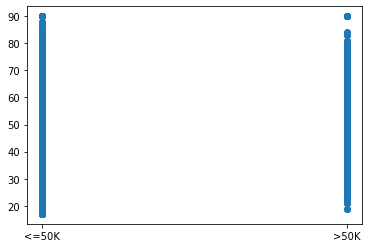

In [9]:
plt.scatter(x=df_train["label"], y=df_train['age'])

In [10]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
label = {'<=50K': 0,'>50K': 1}

In [12]:
df_train.label = [label[item] for item in df_train.label]

In [13]:
label_t = {'<=50K.': 0,'>50K.': 1}

In [14]:
df_test.label = [label_t[item] for item in df_test.label]

In [15]:
print(df_test.label)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: label, Length: 16281, dtype: int64


In [16]:
## Add features to the bucket: 
### Define continuous list
CONTI_FEATURES  = ['age', 'fnlwgt','capital_gain', 'education_num', 'capital_loss', 'hours_week']
### Define the categorical list
CATE_FEATURES = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [17]:
continuous_features = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES]

In [18]:
categorical_features = [tf.feature_column.categorical_column_with_hash_bucket(key=k, hash_bucket_size=1000) for k in CATE_FEATURES]

In [19]:
model = tf.estimator.LinearClassifier(feature_columns=categorical_features+ continuous_features, model_dir='models', n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdb6f10b0d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
FEATURES = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_week', 'native_country']
LABEL= 'label'

In [21]:
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True, steps=1000):
    def input_function():        
        ds = tf.data.Dataset.from_tensor_slices(({k: data_set[k].values for k in FEATURES}, data_set[LABEL]))
        if(shuffle):
            ds = ds.shuffle(steps)
        ds = ds.batch(n_batch).repeat(num_epochs)
        return ds
    return input_function
        

In [22]:
model.train(input_fn=get_input_fn(df_train, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/model.ckpt-8000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8000 into models/model.ckpt.
INFO:tensorflow:loss = 193.88275, step = 8000
INFO:tensorflow:global_step/sec: 49.1545


In [23]:
model.evaluate(input_fn=get_input_fn(df_test, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-26T22:58:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/model.ckpt-9000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Finished evaluation at 2021-01-26-22:58:42
INFO:tensorflow:Saving dict for global step 9000: accuracy = 0.7864996, accuracy_baseline = 0.76377374, auc = 0.5562472, auc_precision_recall = 0.35632217, average_loss = 105.89818, global_step = 9000, label/mean = 0.23622628, loss = 105.44911, precision = 0.8490566, prediction/mean = 0.032593008, recall = 0.11700468
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9000: models/model.ckpt-9000


{'accuracy': 0.7864996,
 'accuracy_baseline': 0.76377374,
 'auc': 0.5562472,
 'auc_precision_recall': 0.35632217,
 'average_loss': 105.89818,
 'label/mean': 0.23622628,
 'loss': 105.44911,
 'precision': 0.8490566,
 'prediction/mean': 0.032593008,
 'recall': 0.11700468,
 'global_step': 9000}

In [24]:
# Adding a second degree polynomial to improve the accuracy of the test

In [25]:
def squareVar(df_t, df_te, var_name="age"):
    df_t["new"] = df_t[var_name].pow(2)
    df_te["new"] = df_te[var_name].pow(2)
    return df_t, df_te

In [26]:
df_train_new, df_test_new = squareVar(df_train, df_test, var_name="age")

In [27]:
print(df_train_new.shape, df_test_new.shape)

(32560, 16) (16281, 16)


In [28]:
df_train_new.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label,new
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,2500
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1444
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,2809
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,784
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,1369


In [29]:
# add the "new" feature to the continuos feature

In [30]:
CONTI_FEATURES_NEW  = ['age', 'fnlwgt','capital_gain', 'education_num', 'capital_loss', 'hours_week', 'new']

In [31]:
continuous_features_new = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES_NEW]

In [32]:
model_1 = tf.estimator.LinearClassifier(feature_columns=categorical_features+ continuous_features_new, model_dir="models_1", n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models_1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdb6f239790>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
FEATURES = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_week', 'native_country', 'new']
LABEL= 'label'

In [34]:
model_1.train(input_fn=get_input_fn(df_train_new, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models_1/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4000 into models_1/model.ckpt.
INFO:tensorflow:loss = 187.35153, step = 4000
INFO:tensorflow:global_step/sec: 45.9799
INFO:tensorflow:loss = 19.121685, step = 4100 (2.175 sec)
INFO:tensorflow:global_step/sec: 183.699
INFO:tensorflow:loss = 28.870447, step = 4200 (0.545 sec)
INFO:tensorflow:global_step/sec: 184.783
INFO:tensorflow:loss = 133.10393, step = 4300 (0.541 sec)
INFO:tensorflow:global_step/sec: 184.188
INFO:tensorflow:loss = 22.39404, step = 4400 (0.543 sec)
INFO:tensorflow:global_step/sec: 184.306
INFO:tensorflow:loss = 110.538475, step = 4500 (0.543 sec)
INFO:tensorflow:global_step/sec: 178.753
INFO:tensorflow:loss = 106.47581, step = 460

In [35]:
model_1.evaluate(input_fn=get_input_fn(df_test_new, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-26T22:59:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models_1/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Finished evaluation at 2021-01-26-22:59:08
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.7837971, accuracy_baseline = 0.76377374, auc = 0.54803044, auc_precision_recall = 0.3429899, average_loss = 189.13927, global_step = 5000, label/mean = 0.23622628, loss = 188.34123, precision = 0.8671171, prediction/mean = 0.027304946, recall = 0.100104004
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: models_1/model.ckpt-5000


{'accuracy': 0.7837971,
 'accuracy_baseline': 0.76377374,
 'auc': 0.54803044,
 'auc_precision_recall': 0.3429899,
 'average_loss': 189.13927,
 'label/mean': 0.23622628,
 'loss': 188.34123,
 'precision': 0.8671171,
 'prediction/mean': 0.027304946,
 'recall': 0.100104004,
 'global_step': 5000}

In [36]:
# Bucketization and interaction

In [37]:
age = tf.feature_column.numeric_column("age")

In [38]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

In [39]:
education_x_occupation = [tf.feature_column.crossed_column(["education", "occupation"], hash_bucket_size=1000)]

In [40]:
age_buckets_x_education_x_occupation = [tf.feature_column.crossed_column([age_buckets, "education", "occupation"], hash_bucket_size=1000)]

In [41]:
base_columns = [age_buckets]

In [42]:
model_2 = tf.estimator.LinearClassifier(
    model_dir="models_2", 
    feature_columns=categorical_features+base_columns+education_x_occupation+age_buckets_x_education_x_occupation)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models_2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdb5fce0050>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [43]:
FEATURES_2 = ['age','workclass', 'education', 'education_num', 'marital',
                'occupation', 'relationship', 'race', 'sex', 'native_country', 'new']

In [44]:
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True, steps=1000):
    def input_function():        
        ds = tf.data.Dataset.from_tensor_slices(({k: data_set[k].values for k in FEATURES_2}, data_set[LABEL]))
        if(shuffle):
            ds = ds.shuffle(steps)
        ds = ds.batch(n_batch).repeat(num_epochs)
        return ds
    return input_function

In [45]:
model_2.train(input_fn=get_input_fn(df_train_new, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models_2/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3000 into models_2/model.ckpt.
INFO:tensorflow:loss = 0.40260714, step = 3000
INFO:tensorflow:global_step/sec: 43.4651
INFO:tensorflow:loss = 0.38662472, step = 3100 (2.301 sec)
INFO:tensorflow:global_step/sec: 205.017
INFO:tensorflow:loss = 0.40554565, step = 3200 (0.488 sec)
INFO:tensorflow:global_step/sec: 205.587
INFO:tensorflow:loss = 0.26146632, step = 3300 (0.486 sec)
INFO:tensorflow:global_step/sec: 204.877
INFO:tensorflow:loss = 0.352853, step = 3400 (0.488 sec)
INFO:tensorflow:global_step/sec: 193.106
INFO:tensorflow:loss = 0.41582814, step = 3500 (0.518 sec)
INFO:tensorflow:global_step/sec: 195.716
INFO:tensorflow:loss = 0.28690657, step 

In [46]:
model_2.evaluate(input_fn=get_input_fn(df_test_new, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-26T22:59:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models_2/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2021-01-26-22:59:38
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.83866155, accuracy_baseline = 0.7639202, auc = 0.8868456, auc_precision_recall = 0.70104945, average_loss = 0.347121, global_step = 4000, label/mean = 0.2360798, loss = 0.346510

{'accuracy': 0.83866155,
 'accuracy_baseline': 0.7639202,
 'auc': 0.8868456,
 'auc_precision_recall': 0.70104945,
 'average_loss': 0.347121,
 'label/mean': 0.2360798,
 'loss': 0.34651068,
 'precision': 0.69607157,
 'prediction/mean': 0.23753694,
 'recall': 0.5619675,
 'global_step': 4000}

In [47]:
model_3 = tf.estimator.LinearClassifier(
    model_dir="models_4", 
    feature_columns=categorical_features+base_columns+education_x_occupation+age_buckets_x_education_x_occupation,
    optimizer=tf.keras.optimizers.Ftrl( learning_rate=0.001, l1_regularization_strength=0.3, l2_regularization_strength=2
    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models_4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdb5ea7e990>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
model_3.train(input_fn=get_input_fn(df_train_new, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models_4/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4000 into models_4/model.ckpt.
INFO:tensorflow:loss = 0.40867764, step = 4000
INFO:tensorflow:global_step/sec: 48.2709
INFO:tensorflow:loss = 0.39532474, step = 4100 (2.072 sec)
INFO:tensorflow:global_step/sec: 196.805
INFO:tensorflow:loss = 0.4234618, step = 4200 (0.508 sec)
INFO:tensorflow:global_step/sec: 197.301
INFO:tensorflow:loss = 0.26601666, step = 4300 (0.507 sec)
INFO:tensorflow:global_step/sec: 202.271
INFO:tensorflow:loss = 0.36861473, step = 4400 (0.494 sec)
INFO:tensorflow:global_step/sec: 171.977
INFO:tensorflow:loss = 0.41694164, step = 4500 (0.582 sec)
INFO:tensorflow:global_step/sec: 136.65
INFO:tensorflow:loss = 0.303675, step = 

In [ ]:
model_3.evaluate(input_fn=get_input_fn(df_test_new, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-26T22:59:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models_4/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]


In [ ]:
print(tf.__version__)